# Logistic Regression 
@ Victor Saidi Phiri

# Question

In this lab assignment you are going to work with data related to the survival of passengers of 
the RMS Titanic. “The sinking of the Titanic is one of the most infamous shipwrecks in
history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable”
RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough
lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and
crew. While there was some element of luck involved in surviving, it seems some groups of
people were more likely to survive than others.” (Quote from the Kaggle Titanic Challenge). 
For the sake of this assignment, let’s imagine that you are called as an expert to a court case:
Sue, one of the survivors of the Titanic accident is suing her father, Leonardo, for not
accompanying Sue and her mother Kate on the trip and this way decreasing their chances of
survival. The family planned to move to the US back in 1912. They bought 3
rd
 class tickets
for the three of them for 8 British Pounds each. (They did not get cabins with their 3
rd
 class
tickets.) The plan was that they embark in Southampton and all of them got on board, but
Leonardo got separated from them in the rush of passengers during boarding. Later it turned
out that Leonardo deliberately got separated from them and got off the boat before it’s
departure, to run away and live with his mistress. Sue was only 4 at the time, and Kate was
20.During the accident Sue got on one of the last lifeboats and was later rescued, but there
was no room for Kate on the lifeboat, and she did not survive the disaster. 
Now, 20 years later, Sue is suing her father for leaving them on the Titanic, because she
thinks that this eventually led to Kate’s death, as the absence of Leonardo decreased their
chances of survival. 
You are called in as an expert to this court case. Your task is to present a report about
whether the presence of Leonardo statistically could have led to an improved chance of
survival. 

## Task:
As usual, start with exploring your dataset. Do descriptive and exploratory analysis including 
visualization to understand the data and to see what type of data you are dealing with. 
You should build a statistical model with which you can accurately estimate Sue’s and Kate’s 
chances of survival. First you should fit a statistical model (for example a logistic regression
model) on the dataset, calculate the regression equation, and use that equation to compute the
survival probability for Sue and Kate separately with and without having Leonardo on board
the ship with them. 
You can use whichever predictor you would like, but you need to build a model that can
correctly predict the outcome value within the sample with at least 72% accuracy for BOTH
those who actually survived and who actually died in the disaster. You need to check this in
the Classification table. So it is not enough to have 72% overall correct percentage





# Load Libraries 

In [79]:
library(dplyr)
library(psych)
library(gridExtra)
library(readr)
library(pscl) # for pR2
library(lmtest) # for lrtest
library(Amelia)
library(dominanceanalysis) # for dominanceAnalysis()
library(broom)
library(knitr)
library(sjPlot)
library(sjmisc)
library(sjlabelled)
library(visdat)# visualise missing values 
#library(modelsummary)
library(ggplot2)
library(tidyr)



Warning message:
"package 'tidyr' was built under R version 3.6.2"

Attaching package: 'tidyr'


The following object is masked from 'package:sjmisc':

    replace_na




# Load dataset 

In [5]:

df_Titanic=read_csv("https://raw.githubusercontent.com/kekecsz/SIMM61-Course-materials/main/Home_assignment/Titanic%20-%20training%20set.csv")

Parsed with column specification:
cols(
  PassengerId = col_double(),
  Survived = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)



## Data screening 
- We checked for the structure and missing values: data has 8.1% of missing  cases with Majority being in Cabinet and Age column 

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	891 obs. of  12 variables:
 $ PassengerId: num  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : num  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : num  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : num  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : num  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  NA "C85" NA "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   PassengerId = col_double(),
  ..   Survived = col_double(),
  ..   Pclass = col_double(),
  ..   Name = col_character(),
  ..   Sex = col_character(),

[1] 866

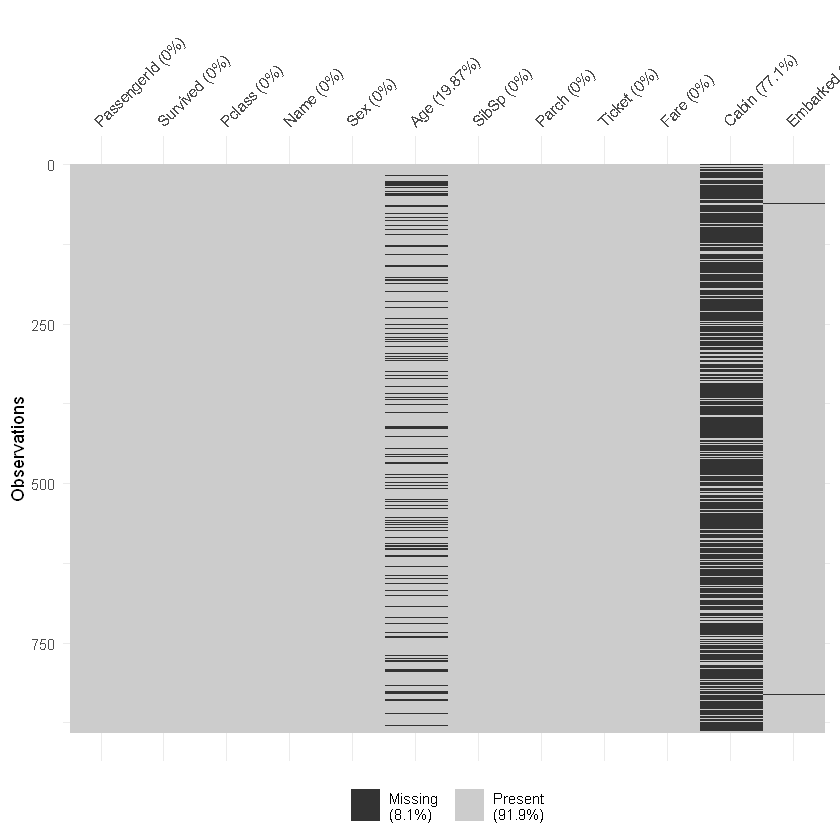

In [10]:
head(df_Titanic)
str(df_Titanic)
sum(is.na(df_Titanic))
vis_miss(df_Titanic)

## Data Manupulation 

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	714 obs. of  12 variables:
 $ PassengerId: num  1 2 3 4 5 7 8 9 10 11 ...
 $ Survived   : num  0 1 1 1 0 0 0 1 1 1 ...
 $ Pclass     : num  3 1 3 1 3 1 3 3 2 3 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 54 2 27 14 4 ...
 $ SibSp      : num  1 1 0 1 0 0 3 0 1 1 ...
 $ Parch      : num  0 0 0 0 0 0 1 2 0 1 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  NA "C85" NA "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   PassengerId = col_double(),
  ..   Survived = col_double(),
  ..   Pclass = col_double(),
  ..   Name = col_character(),
  ..   Sex = col_character(),

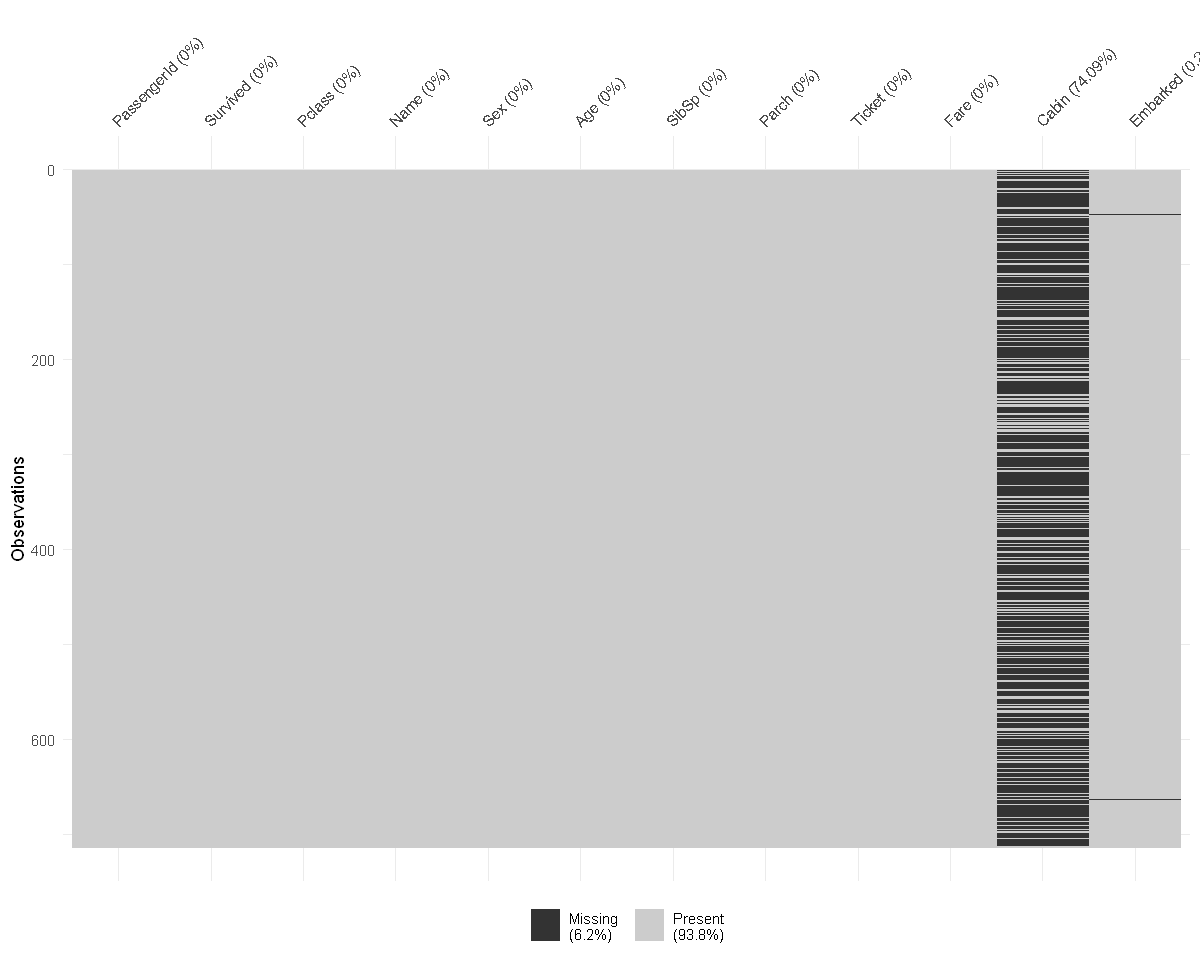

In [50]:
df_Titanic2=df_Titanic %>% filter(!is.na(Age))
vis_miss(df_Titanic2)
str(df_Titanic2)

In [52]:

df<- df_Titanic2 %>%
  mutate(Pclass = factor(Pclass, levels = c(1, 2, 3), labels = c('First Class', 'Second Class', 'Third Class')),
	Survived = factor(Survived, levels = c(0, 1), labels = c('No', 'Yes')),
	                 Sex=as_factor(Sex,levels=c(0,1),labels=c("female","male")))

str(df)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	714 obs. of  12 variables:
 $ PassengerId: num  1 2 3 4 5 7 8 9 10 11 ...
 $ Survived   : Factor w/ 2 levels "No","Yes": 1 2 2 2 1 1 1 2 2 2 ...
 $ Pclass     : Factor w/ 3 levels "First Class",..: 3 1 3 1 3 1 3 3 2 3 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 1 1 1 ...
 $ Age        : num  22 38 26 35 35 54 2 27 14 4 ...
 $ SibSp      : num  1 1 0 1 0 0 3 0 1 1 ...
 $ Parch      : num  0 0 0 0 0 0 1 2 0 1 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  NA "C85" NA "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


### Subset dataframe 

In [63]:

df1 <- df %>% 
  select(Age,
         Sex,
        Pclass,
     Parch,
        Survived,
         SibSp)
df1$Age=as.numeric(df1$Age)
df1$Survuved=factor(df1$Survived)
df1$SibSp= as.numeric(df1$SibSp)
df1$Parch= as.numeric(df1$Parch)

 # Data Visualizations 

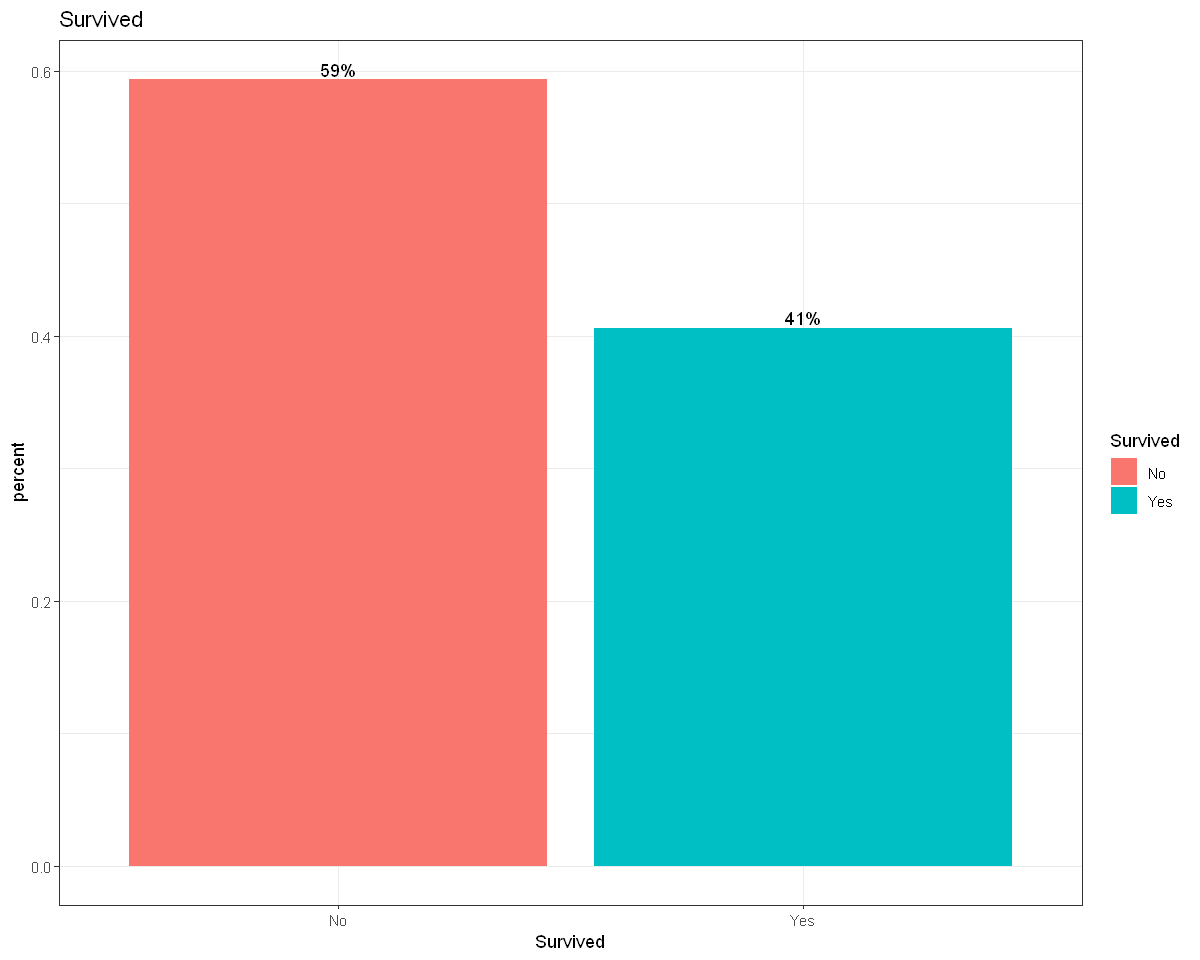

In [64]:
options(repr.plot.width = 10, repr.plot.height = 8)
df1 %>%
ggplot() +
aes(x = Survived) +
  geom_bar(aes(y = (..count..)/sum(..count..), fill=Survived), stat= "count")+
  geom_text(aes(label = scales::percent(round((..count..)/sum(..count..),2)),
                y= ((..count..)/sum(..count..))), stat="count",
            vjust = -.25) +
  ggtitle("Survived") + labs(y = "percent")+theme_bw()

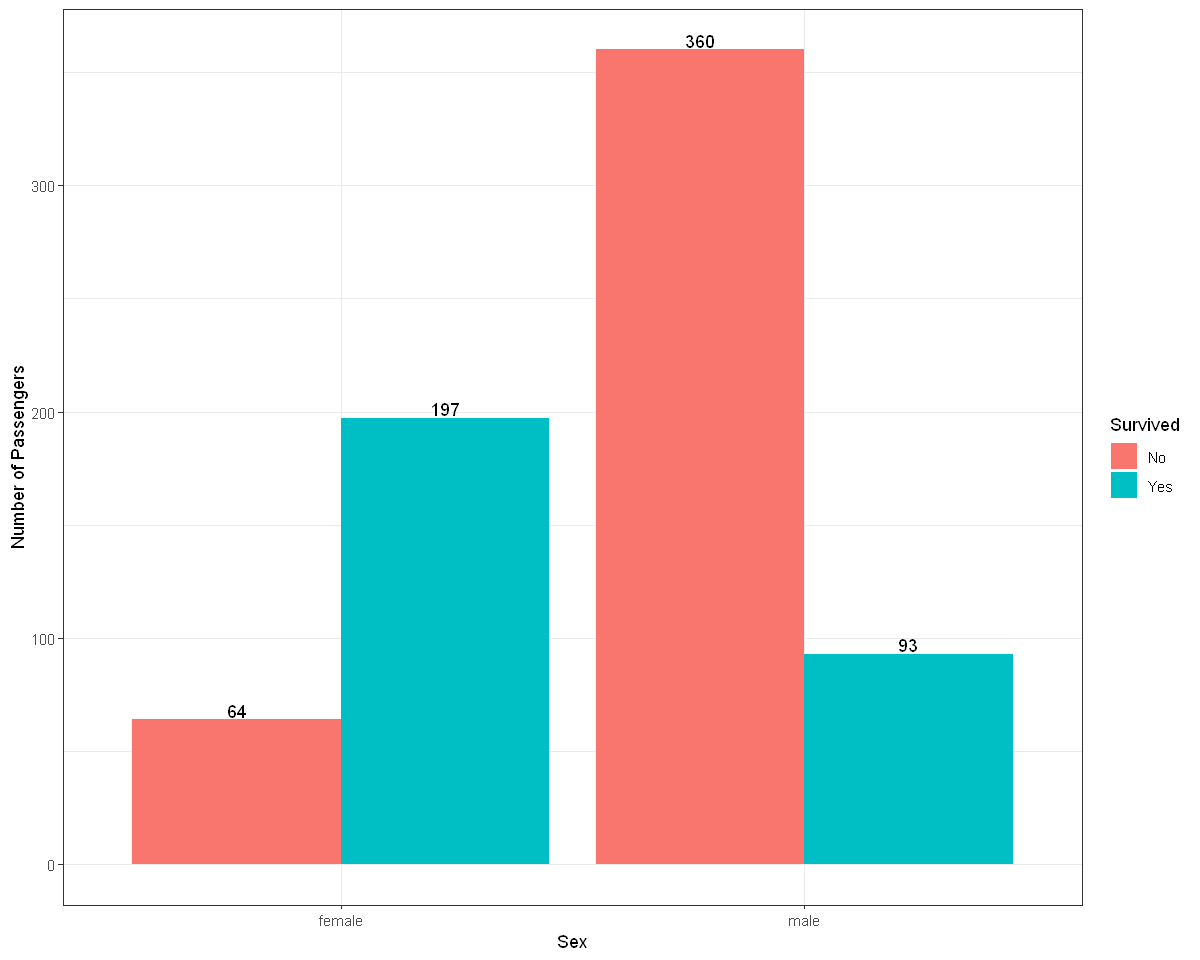

In [65]:
options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(df1, aes(x=Sex,fill=Survived))+ geom_bar(position = "dodge") + 
geom_text(stat='count',aes(label=..count..),position = position_dodge(0.9),vjust=-0.2) +
ylab("Number of Passengers")+ theme_bw()

### Survived by passanger class 


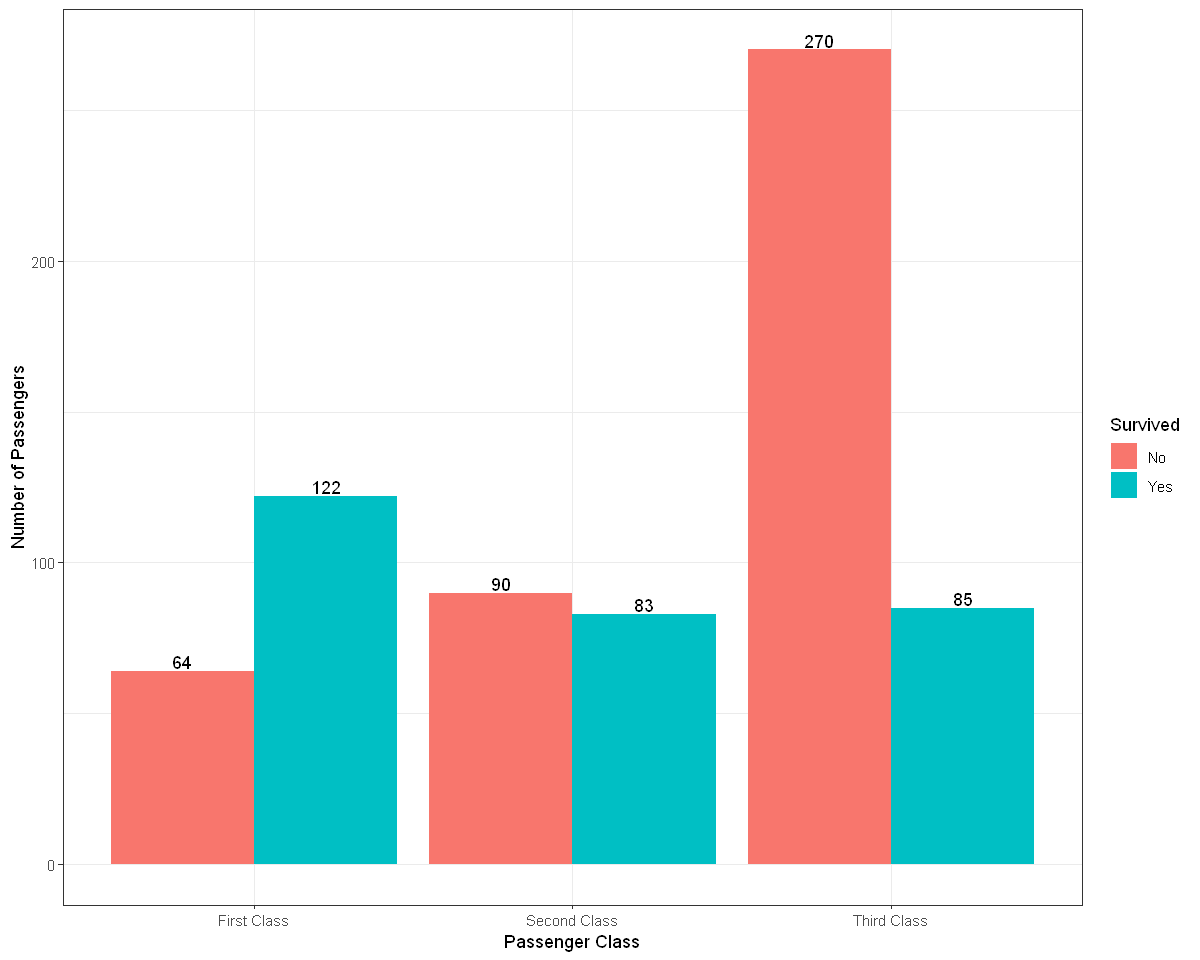

In [66]:
ggplot(df1, aes(x=Pclass,fill=Survived))+ 
geom_bar(position = "dodge") + geom_text(stat='count',aes(label=..count..),position = position_dodge(0.9),vjust=-0.2) +
ylab("Number of Passengers") + xlab("Passenger Class")+theme_bw()

## Titanic Survival Rates by Age by Passanger class
- High fatalities were recorded between ages 20-40.
- Survival rates among males in the third class was very low 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



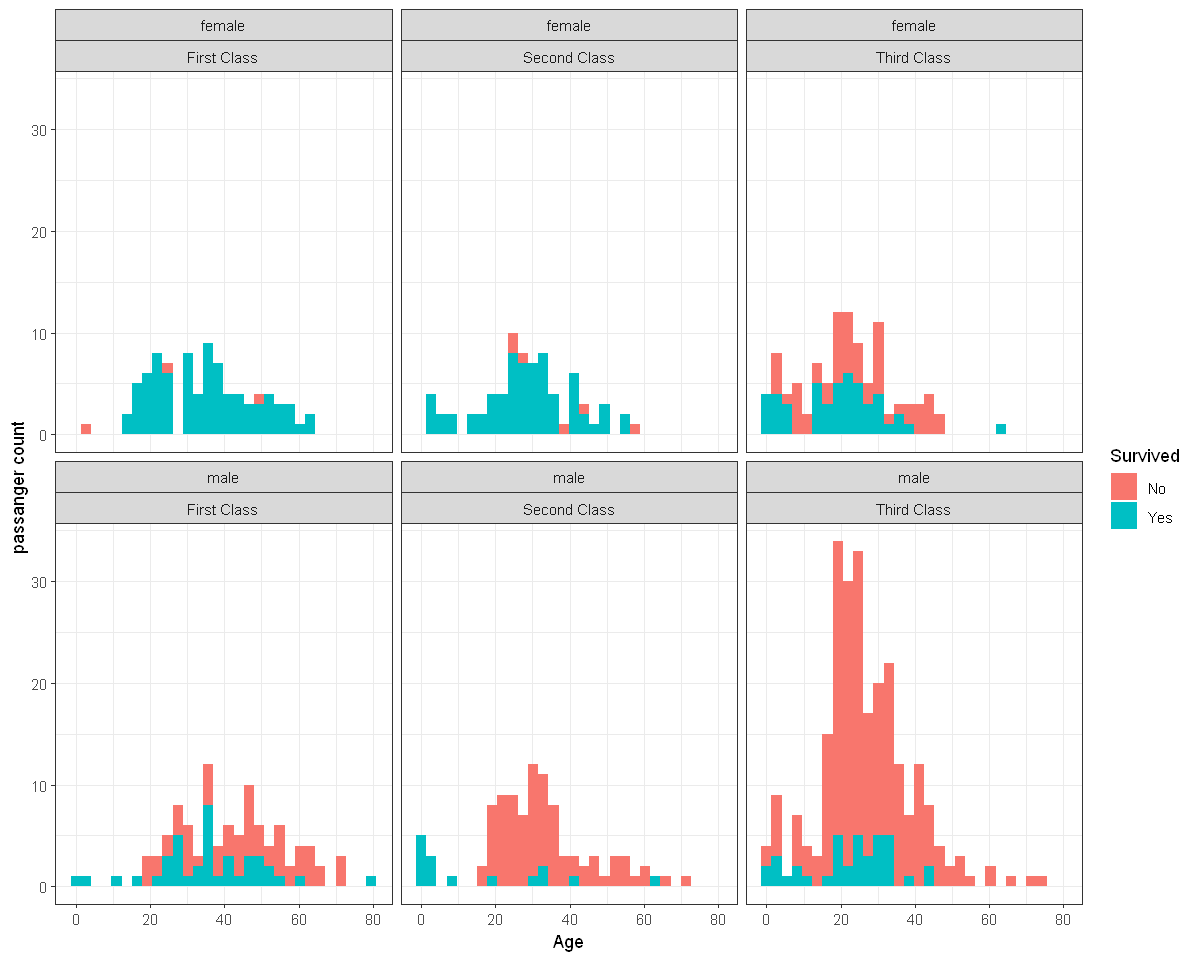

In [67]:
df1 %>%
ggplot() +
aes(x = Age, fill = Survived) +
theme_bw()+
facet_wrap(Sex~Pclass)+
geom_histogram()+
labs(y="passanger count",
       tittle="Titanic Survival Rates by Age by Passanger class")
 

###  Survival rate with sibling and or spouse by class

There was a lower chance of survival for those who were with family in the third class

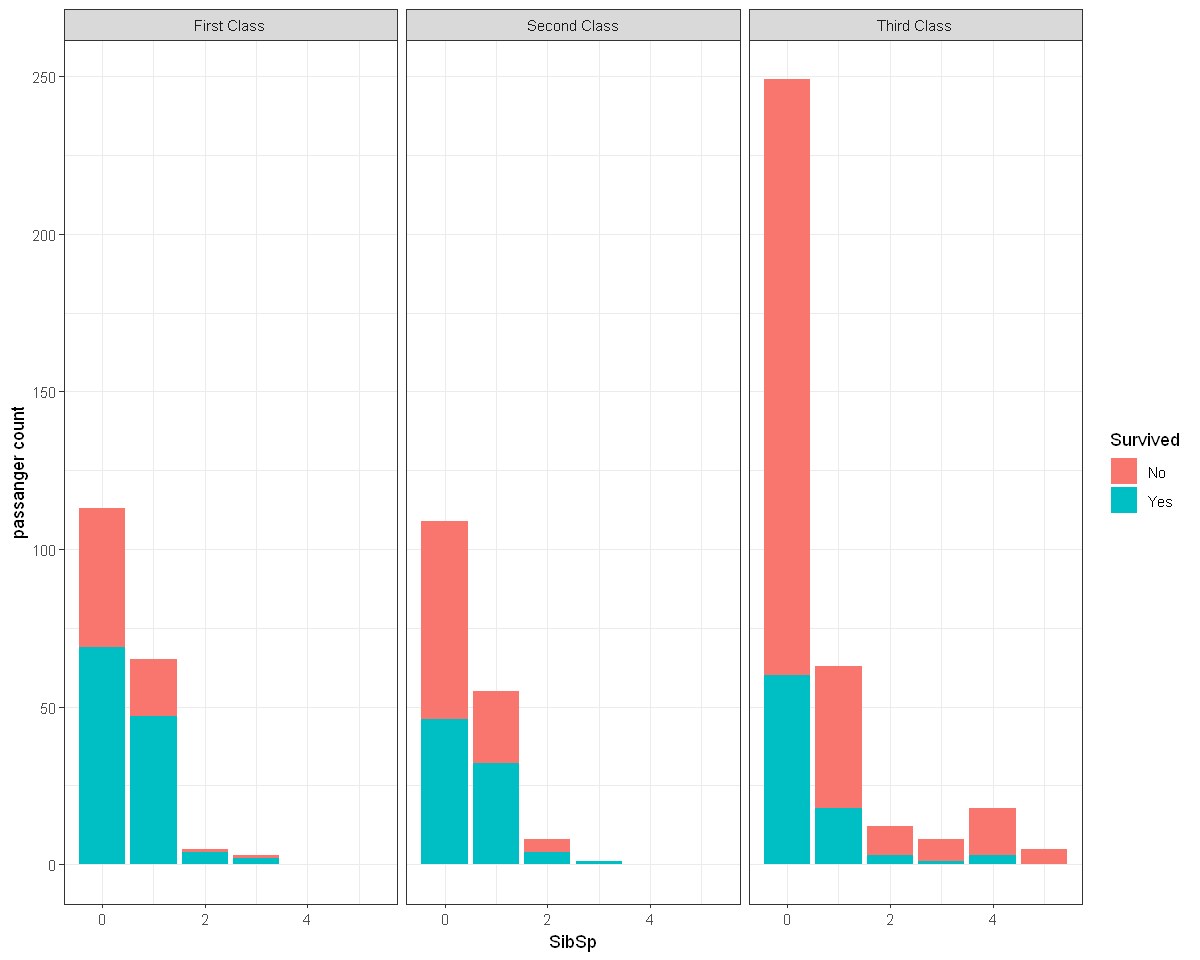

In [68]:
df1 %>%
ggplot() +
aes(x = SibSp, fill = Survived) +
theme_dark()+
facet_wrap(~Pclass)+
geom_bar()+
labs(y="passanger count",
       tittle=" Survival rate with sibling and or spouse by class")+
theme_bw()

 # Design the regression model: 

The previous steps has enabled us to assess our data and come up with the
following model. Outcome valuable: Survived\
Predictors: Sex, Passenger Class(Pclass), Age, Siblings or Spouse(Sibsp)
and Parent/child(Parch)

In [69]:
# Model 1
Tmod1 = glm(Survived~ Sex+Pclass+Age+SibSp+Parch,
family = binomial, data = df1)
summary(Tmod1)

#Even though PClass is not significant, we shall keep it in our model in order to find answers to our question


Call:
glm(formula = Survived ~ Sex + Pclass + Age + SibSp + Parch, 
    family = binomial, data = df1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7723  -0.6353  -0.3869   0.6327   2.4513  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         4.356474   0.455990   9.554  < 2e-16 ***
Sexmale            -2.642267   0.219749 -12.024  < 2e-16 ***
PclassSecond Class -1.415376   0.284712  -4.971 6.65e-07 ***
PclassThird Class  -2.650169   0.285724  -9.275  < 2e-16 ***
Age                -0.044836   0.008229  -5.448 5.09e-08 ***
SibSp              -0.368280   0.126827  -2.904  0.00369 ** 
Parch              -0.038607   0.119601  -0.323  0.74685    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual deviance: 636.46  on 707  degrees of freedom
AIC: 650.46

Number of Fisher Scoring iterati

In [70]:
coefficients(Tmod1)

(Intercept)            Sexmale PclassSecond Class  PclassThird Class 
        4.35647443        -2.64226651        -1.41537613        -2.65016872 
               Age              SibSp              Parch 
       -0.04483609        -0.36828015        -0.03860705

# Model Performance

I use the R2 function to asses the performance of our model and the
null model. "pscl package".

The model has(-318.22 llh) which is bigger than the Null model(-482.26
llhNull). This implies that my model is better than the null model.

In [72]:
  pR2(Tmod1)%>%round(2)
 # 2ll deviance 
pR2(Tmod1)["llh"] * -2 # alternative model

llh  llhNull       G2 McFadden     r2ML     r2CU 
 -318.23  -482.26   328.06     0.34     0.37     0.50

llh 
636.4597

#### Predicting accuracy for categorization

In [73]:
df1= df1 %>%
mutate(pred_Tmod1 = predict(Tmod1)) %>% 
  mutate(pred_Tmod1 = case_when(pred_Tmod1 <= 0 ~"No",
                                pred_Tmod1 > 0 ~ "Yes"))

#### Coding correct cases

In [74]:
df1 = df1 %>%
  mutate(correct_prediction=case_when(pred_Tmod1 == Survived  ~ "correct",
                                      pred_Tmod1 != Survived ~ "incorrect"))


#### Check the model prediction performance
The model has 81% correct prediction rate and 19%
incorrect predictions

In [75]:
df1 %>%
group_by(correct_prediction) %>%
summarise(count = n()) %>%
mutate(freq = count / sum(count))

correct_prediction,count,freq
<chr>,<int>,<dbl>
correct,575,0.8053221
incorrect,139,0.1946779


## Compute the Null model
Model without predictors 

In [76]:
mod_null = glm(Survived ~ 1, family = binomial(), data = df1)

summary(mod_null)


Call:
glm(formula = Survived ~ 1, family = binomial(), data = df1)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.021  -1.021  -1.021   1.342   1.342  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.3799     0.0762  -4.985  6.2e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual deviance: 964.52  on 713  degrees of freedom
AIC: 966.52

Number of Fisher Scoring iterations: 4


#### performance of null model 
The model show that 59% of the people died while 41% died

In [77]:
df1 %>%
group_by(Survived) %>%
summarise(count = n()) %>%
mutate(freq = count / sum(count))

Survived,count,freq
<fct>,<int>,<dbl>
No,424,0.5938375
Yes,290,0.4061625


####  compare the predictions of the null model with the alternative model

In [80]:
df1%>%
group_by(Survived, pred_Tmod1) %>%
summarize(n = n()) %>%
spread(Survived, n)

pred_Tmod1,No,Yes
<chr>,<int>,<int>
No,363,78
Yes,61,212


#### check for the prediction of Survival rate by response category(Survived= Yes/No)

- 73% of survivors were correctly predicted. However, 27% were wrongly predicted. 

In [82]:
df1%>%
filter(Survived == "Yes") %>%
group_by(correct_prediction) %>%
  summarise(count = n()) %>%
  mutate(freq = count / sum(count)) %>%  
mutate(freq = count / sum(count))

correct_prediction,count,freq
<chr>,<int>,<dbl>
correct,212,0.7310345
incorrect,78,0.2689655


In [83]:
df1 %>%
filter(Survived == "No") %>%
group_by(correct_prediction) %>%
summarise(count = n()) %>% mutate(freq = count / sum(count)) 


correct_prediction,count,freq
<chr>,<int>,<dbl>
correct,363,0.8561321
incorrect,61,0.1438679


# Model fit 

The AIC for the model is 650.46 which is lower than 966.52 for the null model as shown in the output below

In [84]:
AIC(mod_null, Tmod1)

,df,AIC
,<dbl>,<dbl>
mod_null,1,966.5160
Tmod1,7,650.4597



# Dominance Analysis 

We conclude from our findings that Sex(0.21) is the main predictor of Survival outcome, followed by Passenger class(0.11), Age(0.02), Sibling or spouse(0.01), and parent or child(0.00)

In [91]:
Dominance_TMod1<-dominanceAnalysis(Tmod1)

contributionByLevel(Dominance_TMod1, fit.functions="r2.m")

,level,Sex,Pclass,Age,SibSp,Parch
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.2216819,0.09818988,0.004445297,0.0002244157,0.0063586405
2,1,0.2167722,0.10446923,0.013341816,0.0024738300,0.0059649301
3,2,0.2082568,0.10673655,0.020141159,0.0040501644,0.0038784234
4,3,0.1986347,0.10832552,0.027308571,0.0068167209,0.0022657765
5,4,0.1872201,0.10938487,0.034124369,0.0094518774,0.0001087219


In [86]:
averageContribution(Dominance_TMod1,fit.functions = "r2.m")

Average Contribution by predictor
       Sex Pclass  Age SibSp Parch
r2.m 0.207  0.105 0.02 0.005 0.004

 # Suvival probality 

${Survived}={\beta}_{Intercept}+{\beta}_{Sex}+{\beta}_{Age}+{\beta}_{Pclass}+{\beta}_{Parch}+{\beta}_{SibSp}$

${Odds}=exp({4.36}+(-2.64)*0+(-1.42)*1+(-2.65)*1+(-0.04)*4+(-0.37)*0+(-0.04)*2) = 4.53$
${Probality}= 4.53/(1+4.53)*100= 82%$

Odds Kate with leonardo

$odds = Exp(4.36+(-2.64)*0+(-1.42)*0+(-2.65)*1+(-0.04)*4+(-0.37)*0+(-0.04)*1)= 4.35$
$Probality= 4.35/(1+4.35)*100=81%)$
 